# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

## Imports 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
sns.set()

## Open datas 

In [10]:
dataPath ='/'.join(os.getcwd().split("/")[:-1])+"/data/"

### Oil production

In [11]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [12]:
def clean (df, unite) :
    indexUSSR = np.where(df[unite]=="USSR")[0][0]
    indexRussie = np.where(df[unite]=="Russian Federation")[0][0]
    df.iloc[indexUSSR] = df.iloc[indexUSSR].fillna(0) + df.iloc[indexRussie].fillna(0)
    df = df.dropna(thresh= len(df.columns)-20).fillna(0)
    return df

def separate_total(df, unite) :
    df_tot = pd.DataFrame(df[df[unite].str.contains("Total")]).set_index(unite)
    df = df[df[unite].str.contains("Total") == False].set_index(unite)
    return df_tot, df

def print_df(df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,pays in enumerate(df.index) :   
        plt.plot(df.columns.values[:-5], df.iloc[k][:-5], label=f"{pays}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()

In [13]:
unite = "Million tonnes"
oil_production = clean(oil_production,unite)
oil_production_total, oil_production = separate_total(oil_production,unite)

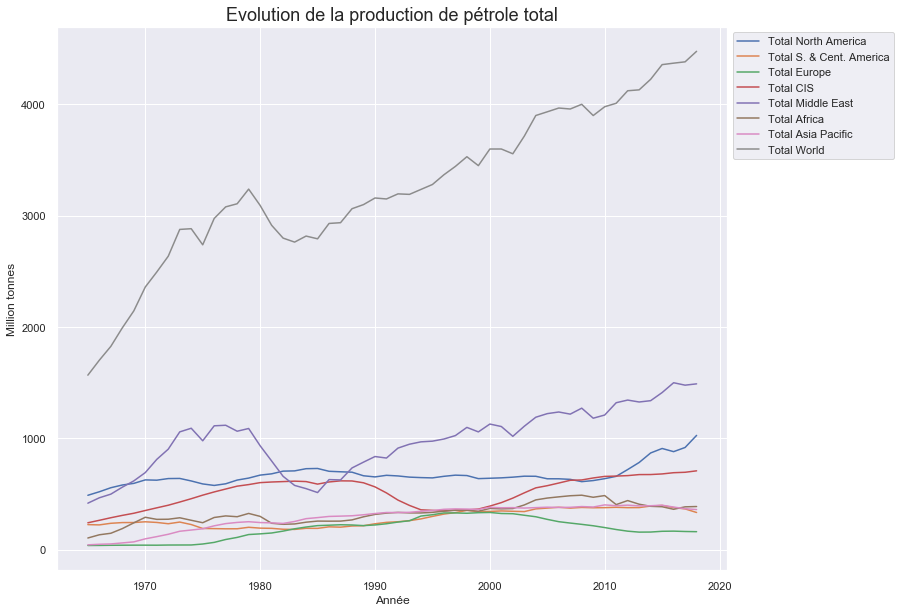

In [14]:
print_df(oil_production_total, "Evolution de la production de pétrole total", unite)

### Gaz production

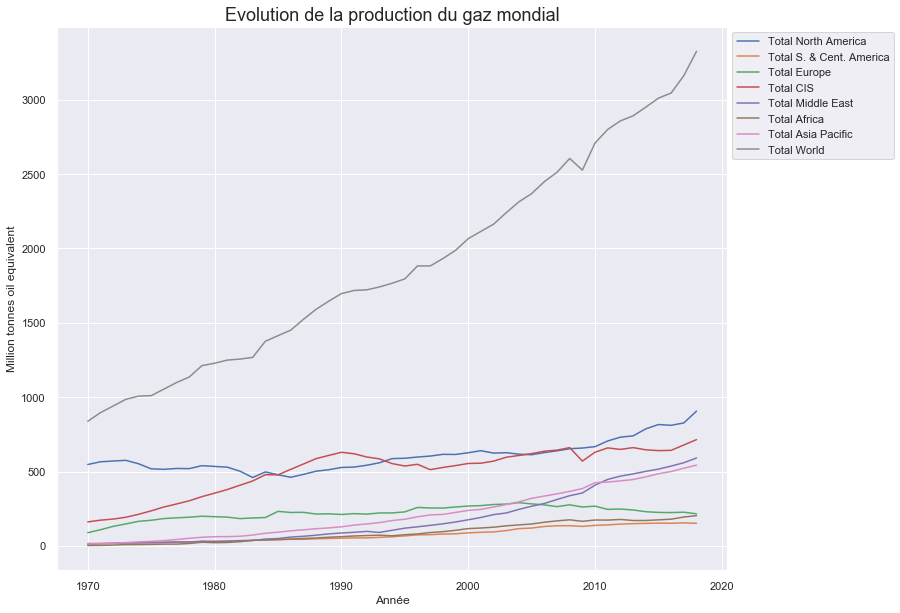

In [15]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 5, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production, unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)

print_df(gaz_production_total, "Evolution de la production du gaz mondial", unite)

### Coal production 

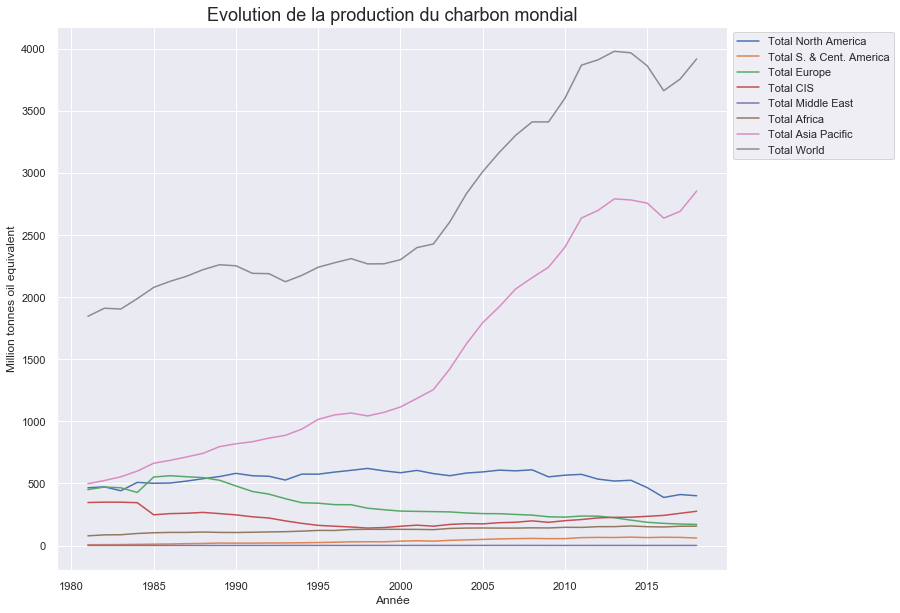

In [16]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 7, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production,unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)

print_df(gaz_production_total, "Evolution de la production du charbon mondial", unite)

### Nuclear : 

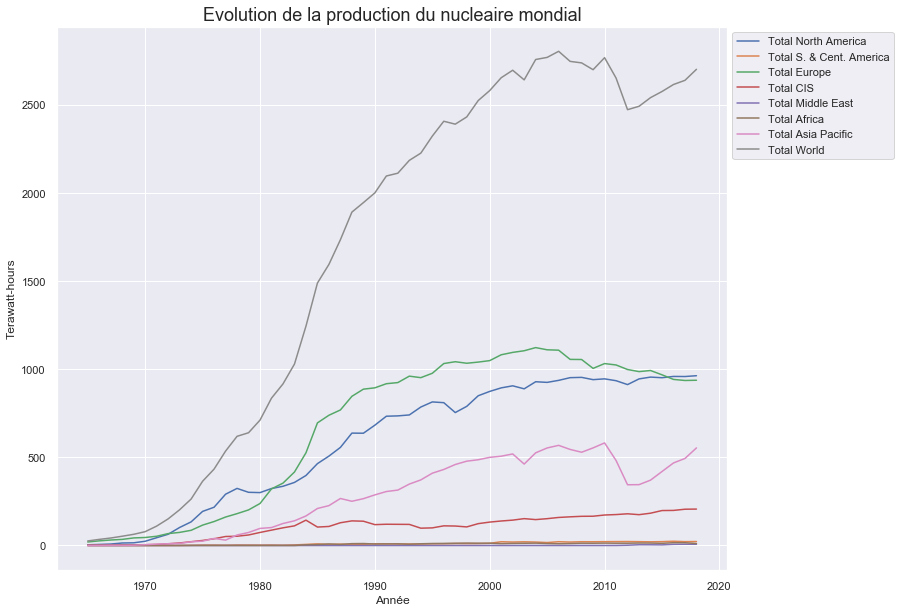

In [17]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 8, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)

print_df(nuclear_production_total, "Evolution de la production du nucleaire mondial", unite)

### Hydro-generation 

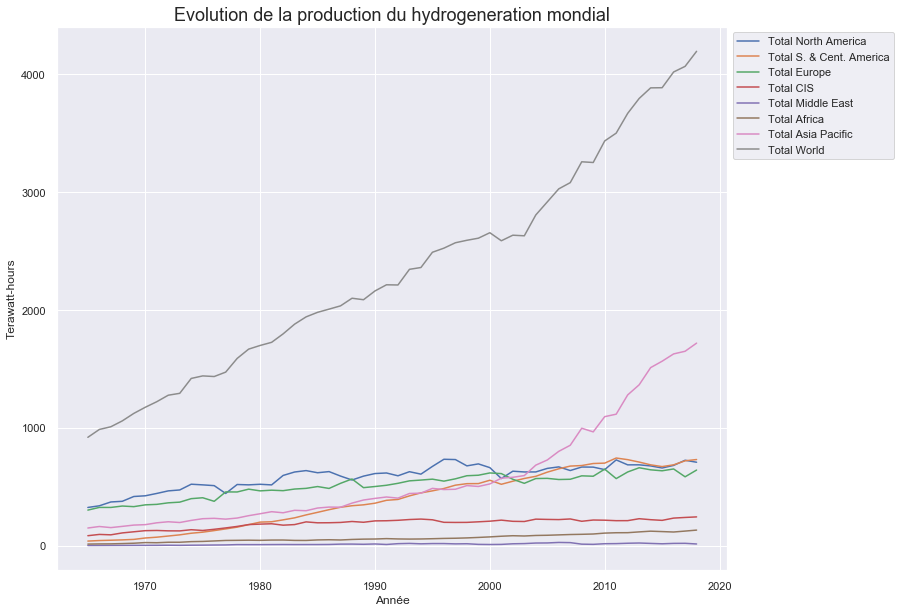

In [18]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 9, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)

print_df(nuclear_production_total, "Evolution de la production du hydrogeneration mondial", unite)